# Calculando as features iniciais
Neste notebook serão calculadas as features iniciais para serem utilizadas como referência para os próximos testes. Elas estão separadas em dois grupos:
1. features baseadas em estatísticas do sinal (como no estudo do LANL)
2. features baseadas em características espectrais (MFCC e STFT)


## Conectando ao Google Drive

In [1]:
## Conectando o notebook com o Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Testando se o notebook acessa o Drive corretamente
!ls 'drive/' 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
'My Drive'  'Shared drives'


In [2]:
#  Mover a pasta compartilhada para algum lugar em seu proprio drive, 
#  para conseguir acessar um atalho para o diretorio a partir daqui.

## Configurar essa variavel de ambiente (path_dados) para cada pessoa
## Meu caminho no drive (alexandre)
%env path_proj=drive/My Drive/Aulas/2019_2/ie301-projeto/projeto/

!ls "$path_proj"
!echo "-------"
!ls .

env: path_proj=drive/My Drive/Aulas/2019_2/ie301-projeto/projeto/
cnn-regressao-submission.ipynb	imagens  notebooks
dados				modelos  submission-cnn.csv
-------
drive  sample_data


In [3]:
## Carregando dados 
!cp "$path_proj/dados/features.pkl" .
# !cp "$path_proj/dados/x_segments.pkl" .
!ls .

drive  features.pkl  sample_data


## Importando bibliotecas

In [4]:
## Basic imports
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

## Utils
import timeit
import time
from tqdm import tqdm
import pickle

## Audio features
# import librosa
# import librosa.display

## Models
from sklearn.ensemble import RandomForestRegressor



Populating the interactive namespace from numpy and matplotlib


## Células de operações com arquivos (gravar/carregar)

In [ ]:
## Backup dos arquivos
# !cp *.pkl "$path_proj/dados/"
!cp *.eps "$path_proj/imagens/"
!cp *.png "$path_proj/imagens/"

In [ ]:
## Gravando as features
# with open('features.pkl', 'wb') as f:
#     feats = {'df_train' : df_train, 
#              'df_valid' : df_valid, 
#              'col_stats' : col_stats, 
#              'col_mfcc' : col_mfcc}
#     pickle.dump(feats, f, protocol=pickle.HIGHEST_PROTOCOL)
#     f.close()
# !cp features.pkl "$path_proj/dados/"

# with open('x_segments.pkl', 'wb') as f:
#     X = {'x_train':x_train,
#          'x_valid':x_valid}
#     pickle.dump(X, f, protocol=pickle.HIGHEST_PROTOCOL)
#     f.close()
# !cp x_segments.pkl "$path_proj/dados/"

# !du -h *.pkl

13M	features.pkl
0	final_model.pkl


### Carregando as features

In [ ]:
with open('features.pkl', 'rb') as f:
    features = pickle.load(f)
    f.close()
features.keys()

df_train = features['df_train']
df_valid = features['df_valid']
col_stats = features['col_stats']
col_mfcc = features['col_mfcc']

del features

## Dropando a coluna y da lista de features
del col_mfcc[0]
del col_stats[0]
## Nova lista completa de features
col_full = col_mfcc + col_stats

In [16]:
len(col_full)

76

## Modelos

In [ ]:
class ModeloRF(RandomForestRegressor):
    """ Classe para experimentacao dos modelos
    """
    # def __init__(self, max_depth=None, random_state=0, n_estimators=50, criterion='mae', n_jobs=-1):
    #     ## modelo de random forest
    #     super(ModeloRF, self).__init__(max_depth=max_depth, 
    #                                    random_state=random_state, 
    #                                    n_estimators=n_estimators, 
    #                                    criterion=criterion,
    #                                    n_jobs=n_jobs   
    #                                   )
    
    def train(self, x, y):
        ## dataset de treino
        # self.x = x
        # self.y = y
        ## treina
        tic = timeit.default_timer()
        self.fit(x, y)
        toc = timeit.default_timer()
        print('Tempo de treino (s):', (toc-tic))
    
    # def plot_validacao(self, xt, yt, xv, yv):
    #     ## predict + plot
    #     figsize(10,3)
    #     subplot(121)
    #     plt.plot(self.predict(xt))
    #     plt.plot(yt)
    #     plt.title('train')
    #     subplot(122)
    #     plt.plot(self.predict(xv))
    #     plt.plot(yv)
    #     plt.title('valid')

In [ ]:
def plot_validacao(modelo, xt, yt, xv, yv):
        ## predict + plot
        figsize(10,3)
        subplot(121)
        plt.plot(modelo.predict(xt))
        plt.plot(yt)
        plt.title('train')
        subplot(122)
        plt.plot(modelo.predict(xv))
        plt.plot(yv)
        plt.title('valid')

### Treinamento

#### RF(25)

In [ ]:
## RF(25) STATS
rf_25_stats = ModeloRF(n_estimators=25, 
                       criterion='mae',
                       max_depth=None, 
                       min_samples_split=30*2,
                       min_samples_leaf=30,
                       random_state=0, 
                       n_jobs=-1)

rf_25_stats.train(df_train.loc[:, col_stats].values, 
                  df_train.loc[:, 'y'].values)

Tempo de treino (s): 298.85248835700077


In [ ]:
## RF(25) MFCC
rf_25_mfcc = ModeloRF(n_estimators=25, 
                       criterion='mae',
                       max_depth=None, 
                       min_samples_split=30*2,
                       min_samples_leaf=30,
                       random_state=0, 
                       n_jobs=-1)

rf_25_mfcc.train(df_train.loc[:, col_mfcc].values, 
                  df_train.loc[:, 'y'].values)

Tempo de treino (s): 987.1096661159991


In [ ]:
## RF(25) FULL
rf_25_full = ModeloRF(n_estimators=25, 
                       criterion='mae',
                       max_depth=None, 
                       min_samples_split=30*2,
                       min_samples_leaf=30,
                       random_state=0, 
                       n_jobs=-1)

rf_25_full.train(df_train.loc[:, col_full].values, 
                  df_train.loc[:, 'y'].values)

Tempo de treino (s): 1225.9497371069992


#### RF(50)

In [ ]:
## RF(50) STATS
rf_50_stats = ModeloRF(n_estimators=50, 
                       criterion='mae',
                       max_depth=None, 
                       min_samples_split=30*2,
                       min_samples_leaf=30,
                       random_state=0, 
                       n_jobs=-1)

rf_50_stats.train(df_train.loc[:, col_stats].values, 
                  df_train.loc[:, 'y'].values)

Tempo de treino (s): 588.2673014770007


In [ ]:
## RF(50) MFCC
rf_50_mfcc = ModeloRF(n_estimators=50, 
                       criterion='mae',
                       max_depth=None, 
                       min_samples_split=30*2,
                       min_samples_leaf=30,
                       random_state=0, 
                       n_jobs=-1)

rf_50_mfcc.train(df_train.loc[:, col_mfcc].values, 
                  df_train.loc[:, 'y'].values)

Tempo de treino (s): 1989.7828422840012


In [17]:
## RF(50) FULL
rf_50_full = ModeloRF(n_estimators=50, 
                       criterion='mae',
                       max_depth=None, 
                       min_samples_split=30*2,
                       min_samples_leaf=30,
                       random_state=0, 
                       n_jobs=-1)

rf_50_full.train(df_train.loc[:, col_full].values, 
                  df_train.loc[:, 'y'].values)

Tempo de treino (s): 1597.709528754


#### RF(100)

In [ ]:
## RF(100) STATS
rf_100_stats = ModeloRF(n_estimators=100, 
                       criterion='mae',
                       max_depth=None, 
                       min_samples_split=30*2,
                       min_samples_leaf=30,
                       random_state=0, 
                       n_jobs=-1)

rf_100_stats.train(df_train.loc[:, col_stats].values, 
                  df_train.loc[:, 'y'].values)

Tempo de treino (s): 1181.5833849500013


In [ ]:
## RF(100) MFCC
rf_100_mfcc = ModeloRF(n_estimators=100, 
                       criterion='mae',
                       max_depth=None, 
                       min_samples_split=30*2,
                       min_samples_leaf=30,
                       random_state=0, 
                       n_jobs=-1)

rf_100_mfcc.train(df_train.loc[:, col_mfcc].values, 
                  df_train.loc[:, 'y'].values)

Tempo de treino (s): 4048.341108986002


In [ ]:
## RF(100) FULL
rf_100_full = ModeloRF(n_estimators=100, 
                       criterion='mae',
                       max_depth=None, 
                       min_samples_split=30*2,
                       min_samples_leaf=30,
                       random_state=0, 
                       n_jobs=-1)

rf_100_full.train(df_train.loc[:, col_full].values, 
                  df_train.loc[:, 'y'].values)

KeyboardInterrupt: ignored

### Plot dos resultados

In [ ]:
def plot_resultados(modelo, colunas):
    with plt.style.context('ggplot'):
        figsize(4,7)
        subplot(211)
        plt.plot(modelo.predict(df_valid.loc[:,colunas].values));
        # plt.plot(df_valid.loc[:,'y'].values);
        plt.ylabel('Tempo até falha')
        plt.xlabel('Instante (k-ésimo segmento)')
        
        subplot(212)
        plt.plot(modelo.predict(df_valid.loc[:,colunas].values), df_valid.loc[:,'y'].values, '.');
        plt.ylabel('Valor verdadeiro')
        plt.xlabel('Predição')
        plt.plot([0, 10], [0, 10])
        # plt.legend()
        # savefig()

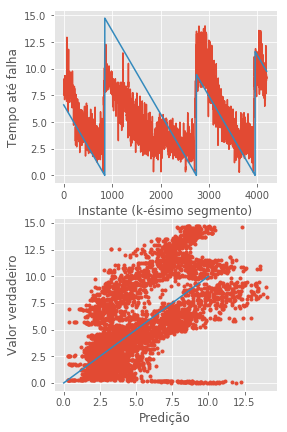

In [ ]:
plot_resultados(rf_25_stats, col_stats)

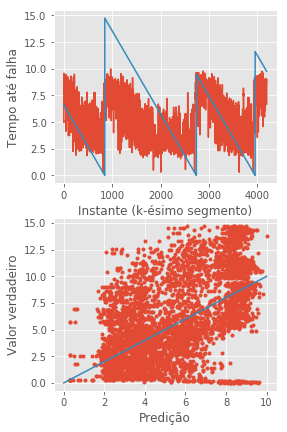

In [ ]:
plot_resultados(rf_25_mfcc, col_mfcc)

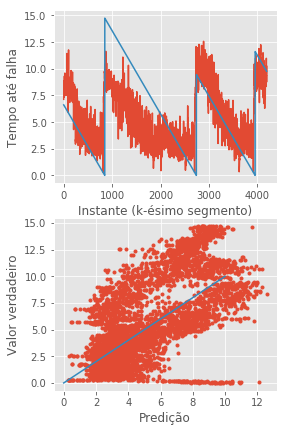

In [ ]:
plot_resultados(rf_25_full, col_full)

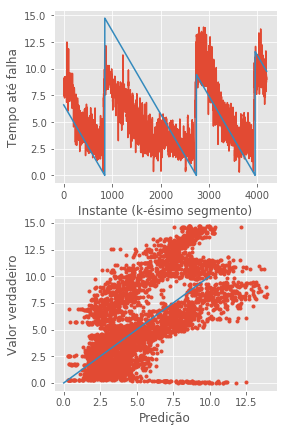

In [ ]:
plot_resultados(rf_50_stats, col_stats)

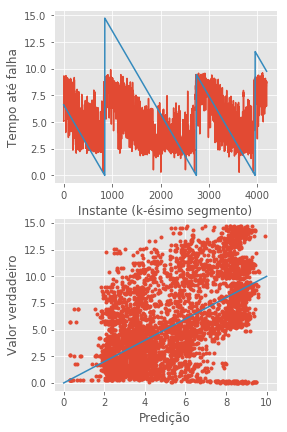

In [ ]:
plot_resultados(rf_50_mfcc, col_mfcc)

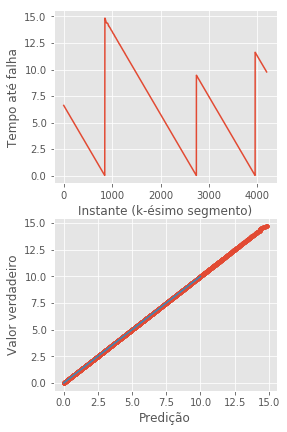

In [ ]:
plot_resultados(rf_50_full, col_full)
# savefig('rf_50_full.eps', dpi=400, format='eps')
# savefig('rf_50_full.png', dpi=400, format='png')

### Calculo do erro absoluto médio

In [ ]:
def calcula_mae(modelo, colunas):
    return np.mean(np.abs(
        modelo.predict(df_valid.loc[:,colunas].values)-df_valid.loc[:,'y'].values))

In [ ]:
print('Erro absoluto médio dos classificadores')
print('RF(25) (stats):', calcula_mae(rf_25_stats, col_stats))
print('RF(25) (mfcc):', calcula_mae(rf_25_mfcc, col_mfcc))
print('RF(25) (full):', calcula_mae(rf_25_full, col_full))
print('RF(50) (stats):', calcula_mae(rf_50_stats, col_stats))
print('RF(50) (mfcc):', calcula_mae(rf_50_mfcc, col_mfcc))
print('RF(50) (full):', calcula_mae(rf_50_full, col_full))

Erro absoluto médio dos classificadores
RF(25) (stats): 2.5012761153325225
RF(25) (mfcc): 2.6373738514166964
RF(25) (full): 2.4744897967962016
RF(50) (stats): 2.4935733669510416
RF(50) (mfcc): 2.634931456244998
RF(50) (full): 2.4694826578040567


In [ ]:
## Gravando os modelos RF
with open('modelos-rf.pkl', 'wb') as f:
    modelos = {'rf_25_stats' : rf_25_stats,
            'rf_25_mfcc' : rf_25_mfcc,
            'rf_25_full' : rf_25_full,
            'rf_50_stats' : rf_50_stats,
            'rf_50_mfcc' : rf_50_mfcc,
            'rf_50_full' : rf_50_full
            }
    pickle.dump(modelos, f, protocol=pickle.HIGHEST_PROTOCOL)
    f.close()
!cp modelos-rf.pkl "$path_proj/modelos/"

# with open('x_segments.pkl', 'wb') as f:
#     X = {'x_train':x_train,
#          'x_valid':x_valid}
#     pickle.dump(X, f, protocol=pickle.HIGHEST_PROTOCOL)
#     f.close()
# !cp x_segments.pkl "$path_proj/dados/"

# !du -h *.pkl

In [ ]:
## Gravando os modelos RF
with open('modelo-rf-50-full.pkl', 'wb') as f:
    modelos = {
            'rf_50_full' : rf_50_full
            }
    pickle.dump(modelos, f, protocol=pickle.HIGHEST_PROTOCOL)
    f.close()
!cp modelo-rf-50-full.pkl "$path_proj/modelos/"

# with open('x_segments.pkl', 'wb') as f:
#     X = {'x_train':x_train,
#          'x_valid':x_valid}
#     pickle.dump(X, f, protocol=pickle.HIGHEST_PROTOCOL)
#     f.close()
# !cp x_segments.pkl "$path_proj/dados/"

# !du -h *.pkl

In [ ]:
## Gravando os modelos RF
!cp "$path_proj/modelos/modelo-rf-50-full.pkl" .
with open('modelo-rf-50-full.pkl', 'rb') as f:
    modelos = pickle.load(f)
    f.close()

rf_50_full = modelos['rf_50_full']
del modelos

## Resultados finais

In [ ]:
rf_50_full_pred_train = rf_50_full.predict(df_train.loc[:,col_full].values)

In [ ]:
rf_50_full_pred_valid = rf_50_full.predict(df_valid.loc[:,col_full].values)

In [ ]:
## Carregando os resultados LinReg e MLP
with open('resultados-rf-50-full.pkl', 'wb') as f:
    modelos = { 'rf_50_full_pred_valid': rf_50_full_pred_valid }
    pickle.dump(modelos, f, protocol=pickle.HIGHEST_PROTOCOL)
    f.close()
!cp resultados-rf-50-full.pkl "$path_proj/modelos/resultados/"

# with open('x_segments.pkl', 'wb') as f:
#     X = {'x_train':x_train,
#          'x_valid':x_valid}
#     pickle.dump(X, f, protocol=pickle.HIGHEST_PROTOCOL)
#     f.close()
# !cp x_segments.pkl "$path_proj/dados/"

# !du -h *.pkl

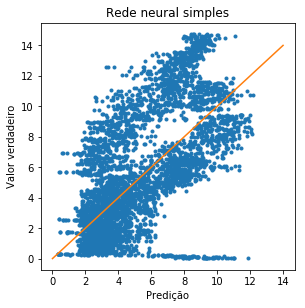

In [ ]:
figsize(10,10)

subplot(221)
plt.title('Rede neural simples')
plt.plot(rf_50_full_pred_valid, df_valid.loc[:,'y'].values, '.');
plt.ylabel('Valor verdadeiro')
plt.xlabel('Predição')
plt.plot([0, 14], [0, 14])


# subplot(222)
# plt.title('Regressão Linear')
# plt.plot(lr_full.predict(df_valid.loc[:,col_full].values), df_valid.loc[:,'y'].values, '.');
# plt.ylabel('Valor verdadeiro')
# plt.xlabel('Predição')
# plt.xlim([-.5, 14.5])
# plt.plot([0, 14], [0, 14])

# subplot(223)
# plt.title('Rede neural simples')
# plt.plot(mlp_sigm_full.predict(df_valid.loc[:,col_full].values), df_valid.loc[:,'y'].values, '.');
# plt.ylabel('Valor verdadeiro')
# plt.xlabel('Predição')
# plt.plot([0, 14], [0, 14])

# plt.legend()
# savefig()